In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

from astropy import units as u
from astropy import constants as const


In [2]:
#Initial parameters
#inclination angle
ip = np.array([88.69, 91.31]) / 180 * np.pi * u.rad;
np.sin(ip)

<Quantity [0.99973863, 0.99973863]>

In [3]:
np.cos(ip)

<Quantity [ 0.02286182, -0.02286182]>

Text(0, 0.5, '$\\Delta \\Omega _p$')

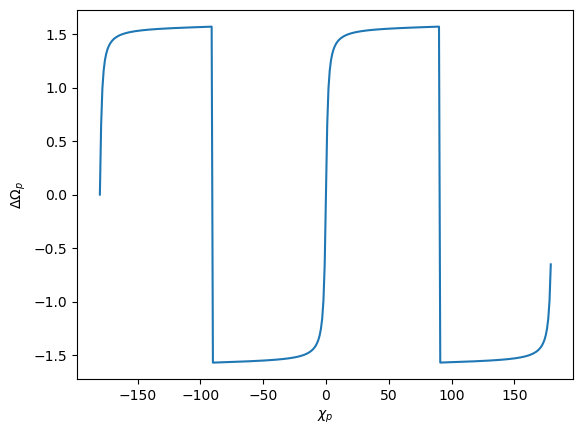

In [4]:

xp = np.arange(-180,180,1) / 180 * np.pi * u.rad
DO = np.arctan(np.tan(xp)/ np.cos(ip[0]))
plt.plot(xp * 180 / np.pi * u.deg, DO)
plt.xlabel('$\chi_p$')
plt.ylabel('$\Delta \Omega _p$')

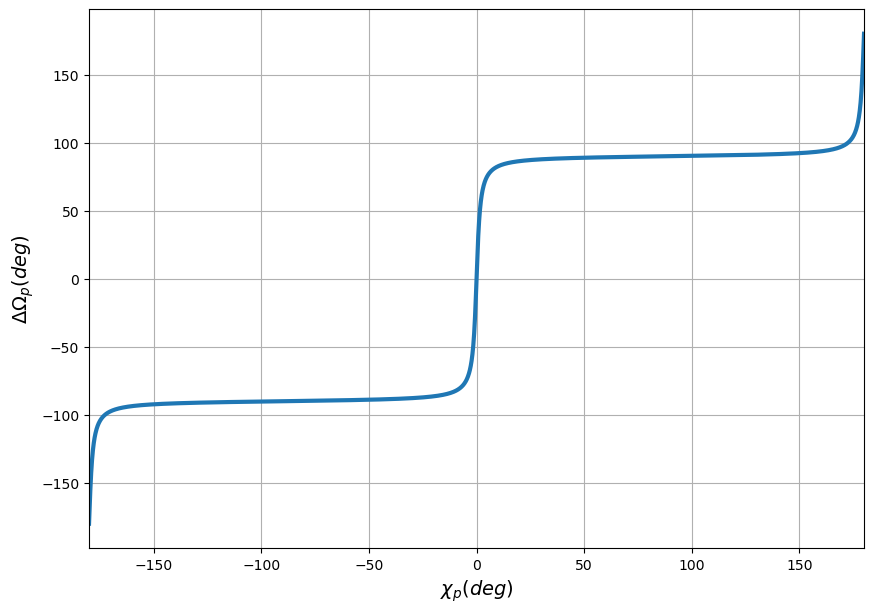

In [5]:
fntsize = 14;

#chi_p
xp = np.arange(-180,180.1,0.1) / 180 * np.pi * u.rad

#Delta Omega_p
DO = np.arctan2(np.sin(xp)/ np.cos(ip[0]), np.cos(xp)) 

#rad to degree
r2d = 180 / np.pi * u.deg / u.rad

plt.figure(figsize=(10,7))
plt.plot(xp * r2d, DO * r2d , lw = 3)
plt.xlabel('$\chi_p (deg) $', fontsize = fntsize)
plt.ylabel('$\Delta \Omega _p (deg)$', fontsize = fntsize)
plt.xlim([-180, 180])

plt.grid(); 

plt.savefig("DO of chip.jpg")

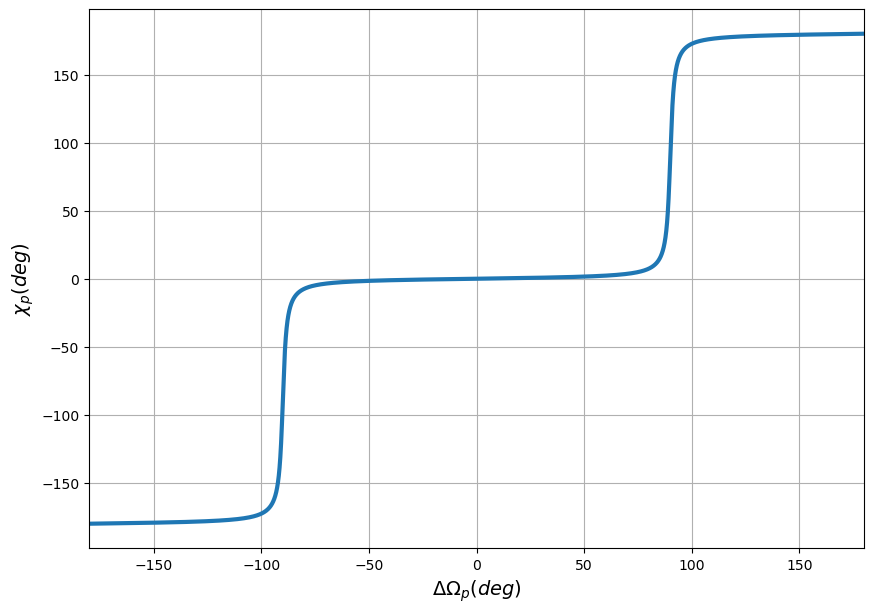

In [6]:
plt.figure(figsize=(10,7))
plt.plot(DO * r2d, xp * r2d , lw = 3)
plt.ylabel('$\chi_p (deg) $', fontsize = fntsize)
plt.xlabel('$\Delta \Omega _p (deg)$', fontsize = fntsize)
plt.xlim([-180, 180])
plt.grid(); 

In [7]:
DO * r2d

<Quantity [-180.        , -175.63435897, -171.31880204, ...,  171.31880204,
            175.63435897,  180.        ] deg>

## Interpolating

In [8]:
from scipy import interpolate

xpDO = interpolate.interp1d(DO, xp)

In [9]:
DOi = np.linspace(-179.99, 179.99, 1000) * u.deg / r2d

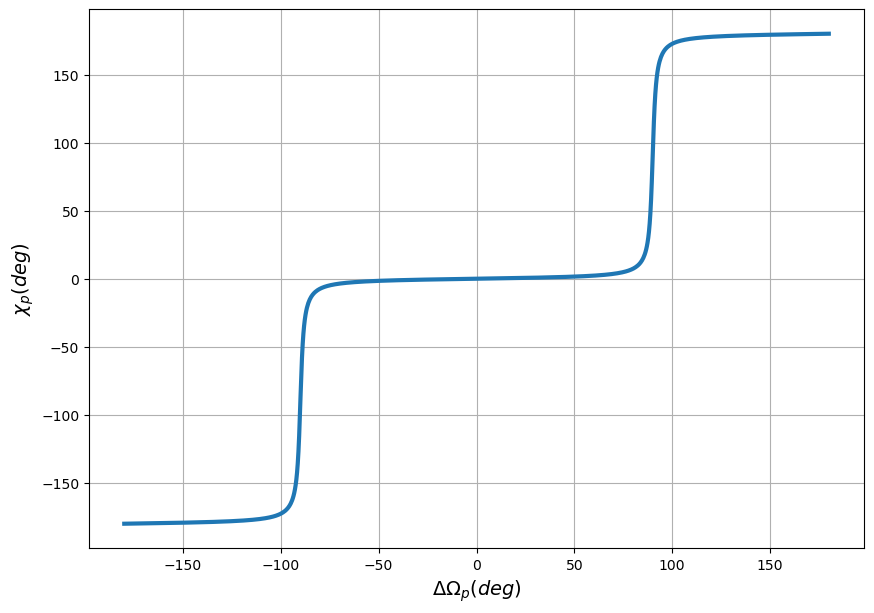

In [10]:
plt.figure(figsize=(10,7))
plt.plot(DOi * r2d, xpDO(DOi) * r2d , lw = 3)
plt.ylabel('$\chi_p (deg) $', fontsize = fntsize)
plt.xlabel('$\Delta \Omega _p (deg)$', fontsize = fntsize)

plt.grid(); 

plt.savefig("chip of DO.jpg")

In [11]:
DO

<Quantity [-3.14159265, -3.06539784, -2.99007717, ...,  2.99007717,
            3.06539784,  3.14159265] rad>

## Finding A and $\chi_p$ first

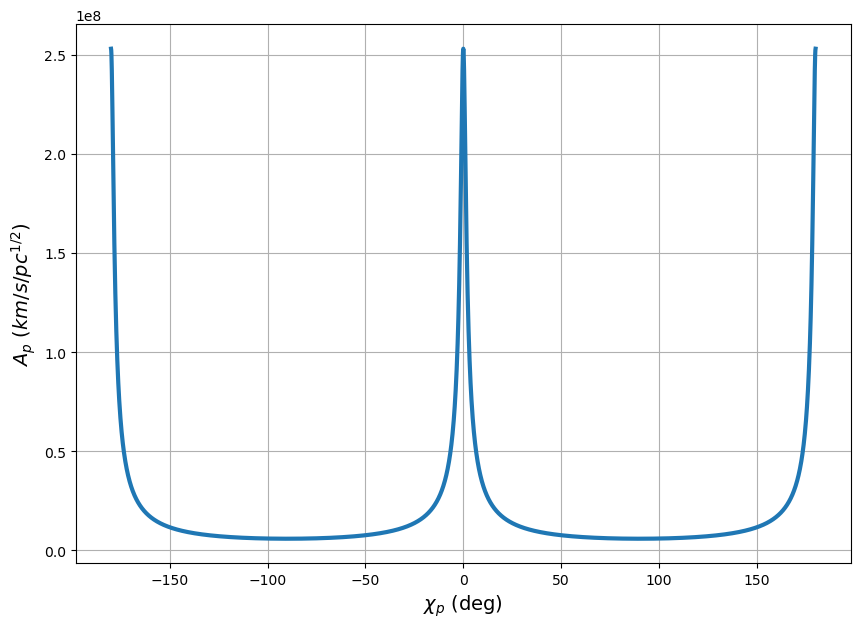

In [12]:
%matplotlib inline
plt.figure(figsize=(10,7))

Kp = 1 
dp = 1 * u.kpc
deff = 0.7*dp

d2s = 86400 * u.s / u.d
km2m = 1e3 * u.km / u.m

##realistic values from Rickett
p_orb_p = 0.102 * u.day
asini_p = 1.41502860 * const.c * u.s

Kp = 2.*np.pi * asini_p / p_orb_p / d2s * km2m

A = Kp * np.sqrt(deff) /  (dp * np.sin(ip[0])) * np.sqrt( (1 - np.sin(ip[0])**2) / (1 - np.sin(ip[0])**2 * np.cos(xp)**2 )  )

plt.plot(xp * 180 / np.pi, A, lw=3)
plt.xlabel('$\chi_p$' + " (deg)", fontsize = fntsize)
plt.ylabel('$A_p$' + " $(km/s/pc^{1/2})$", fontsize = fntsize)
#plt.yscale('log');
plt.grid()

plt.savefig("Ap of chi.jpg")

In [13]:
1e7 / 6e6

1.6666666666666667

In [14]:
-35 + 144

109

In [15]:
max(A) / min(A)

<Quantity 43.74104714>

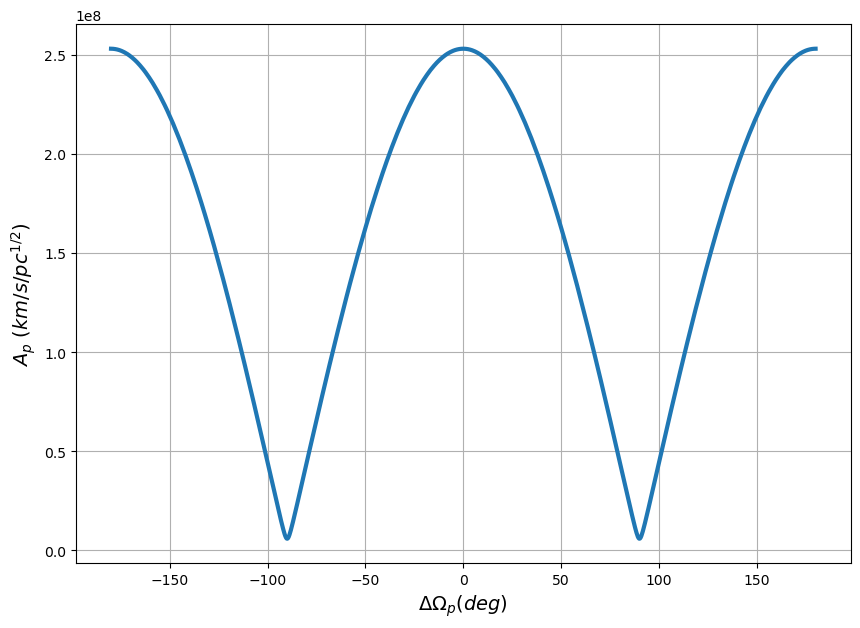

In [16]:
%matplotlib inline
plt.figure(figsize=(10,7))

# plt.plot(DOi * r2d, xpDO(DOi) * r2d , lw = 3)

A = Kp * np.sqrt(deff) /  (dp * np.sin(ip[0])) * np.sqrt( (1 - np.sin(ip[0])**2) / (1 - np.sin(ip[0])**2 * np.cos(xpDO(DOi))**2 )  )

plt.plot(DOi * r2d, A, lw = 3)
plt.xlabel('$\Delta \Omega _p (deg)$', fontsize = fntsize)
plt.ylabel('$A_p$' + " $(km/s/pc^{1/2})$", fontsize = fntsize)
# plt.yscale('log');
plt.grid()

plt.savefig("Ap of DO.jpg")


In [17]:
#-50 to 50
2.55 / 1.5

1.7

In [18]:
# -30 to 30
2.5 / 2.2

1.1363636363636362

In [19]:
max(A) / min(A)

<Quantity 43.6263163>

In [20]:
def orbital_params(DO, dp, Kp ,deff, ip):
    #Function to output chi and A from the input distance, and delta omega, given deff and K
    #take DO in radians
    xp = xpDO(DO)
    A = Kp * np.sqrt(deff) /  (dp * np.sin(ip)) * np.sqrt( (1 - np.sin(ip)**2) / (1 - np.sin(ip)**2 * np.cos(xp)**2 )  )
    
    return xp, A 

In [21]:
orbital_params(np.pi/2, dp, Kp ,deff, ip[0]) 

(array(1.57079633), <Quantity 5786623.72974553 km / (kpc(1/2) s)>)

## Equation (1)

### $\eta = \frac{ \lambda }{ 2c} \left|A_e \sin \left(\phi_e-\chi_e\right)+A_p \sin \left(\phi_p-\chi_p\right)+C\right|^{-1}$

Text(0.5, 0, 'time (a.u.)')

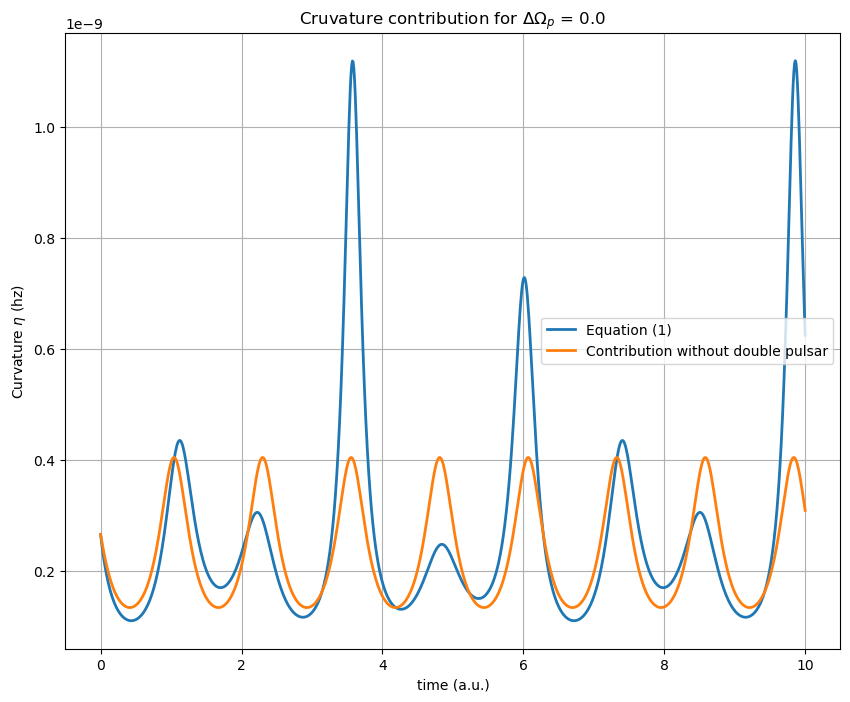

In [22]:
Ae = 1.5
xe = 0.5
we = 5

wp = 3
C = 3

t = np.linspace(0,10,1000)

f = 820 *u.MHz#in mhz

Mhz2m = 299 * u.m * u.MHz
l = Mhz2m / f# in m
c = 3e8 #in m/s

DO = 0
xp , Ap = orbital_params(DO, 1, 1, 1, ip[0])

def curvature (t, l, c, C, wp, we, Ap, Ae, xp, xe ):
    eta = l/(2*c) * np.abs( Ae * np.sin(we*t - xe) + Ap * np.sin( wp * t - xp) + C ) ** -1
    eta2 = l/(2*c) * np.abs( Ae * np.sin(we*t - xe)  + C ) ** -1
    return eta, eta2

plt.figure(figsize = (10,8))

plt.plot(t,curvature (t, l, c, C, wp, we, Ap, Ae, xp, xe )[0], label = "Equation (1)", lw = 2)
plt.plot(t,curvature (t, l, c, C, wp, we, Ap, Ae, xp, xe )[1] , label = "Contribution without double pulsar", lw = 2)
plt.grid(); plt.legend()

plt.title("Cruvature contribution for " + "$\Delta \Omega_p$ = " + str(DO * 180 / np.pi))
plt.ylabel('Curvature ' + '$\eta$' + ' (hz)', )
plt.xlabel( 'time (a.u.)')

In [23]:
f = 1 * u.MHz#in mhz

Mhz2m = 299 * u.m * u.MHz
l = Mhz2m / f# in m

%matplotlib inline

l

<Quantity 299. m>

Text(0.5, 0, 'time (a.u.)')

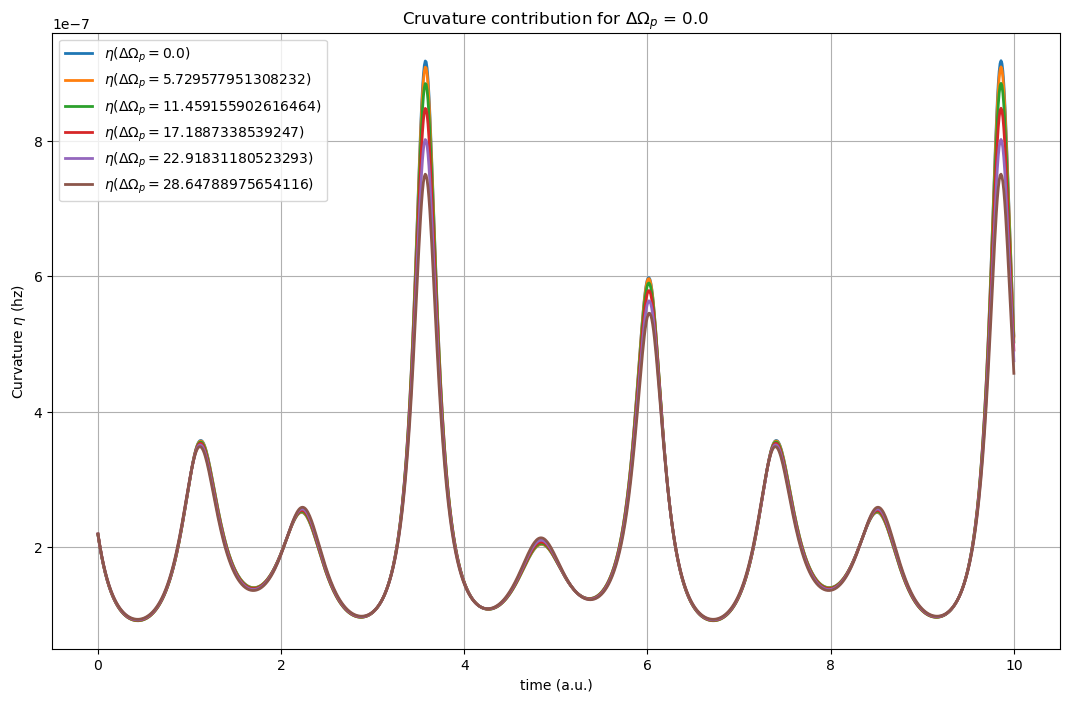

In [24]:
d = 0.1 * np.array([1, 2, 3, 4, 5])
DO = 0

def curvature2 (t, l, c, C, wp, we, Ae, xe, d1, DO ):
    xp , Ap = orbital_params(DO + d1, 1, 1, 1, ip[0])
    eta = l/(2*c) * np.abs( Ae * np.sin(we*t - xe) + Ap * np.sin( wp * t - xp) + C ) **(-1)
    return eta

plt.figure(figsize = (13,8))

xp , Ap = orbital_params(DO, 1, 1, 1, ip[0])
eta = l/(2*c) * np.abs( Ae * np.sin(we*t - xe) + Ap * np.sin( wp * t - xp) + C ) **(-1)
plt.plot(t,eta, label = "$\eta( \Delta \Omega_p = $" + str(DO * 180/np.pi) + ")", lw = 2)

for i in range(0, len(d)):
    
#plt.plot(t,curvature2 (t, l, c, C, wp, we, Ae, xe, d, DO )[1] , label = "$\eta( \Delta \Omega_p = $" + str((DO + d) * 180/np.pi) + ")", lw = 2)
    eta2 = curvature2 (t, l, c, C, wp, we, Ae, xe, d[i], DO )
    plt.plot(t,eta2, label = "$\eta( \Delta \Omega_p = $" + str((DO + d[i])*180/np.pi) + ")", lw = 2)
plt.grid(); plt.legend()
plt.title("Cruvature contribution for " + "$\Delta \Omega_p$ = " + str(DO * 180 / np.pi))
plt.ylabel('Curvature ' + '$\eta$' + ' (hz)', )
plt.xlabel( 'time (a.u.)')

 ### $\eta = \frac{ \lambda }{ 2c} \left|A_e \sin \left(\phi_e-\chi_e\right)+A_p \sin \left(\phi_p-\chi_p\right)+C\right|^{-1}$

## $\phi_p (t) = \frac{t - t_{asc, p}}{P_b} $

Text(0.5, 0, 'time (a.u.)')

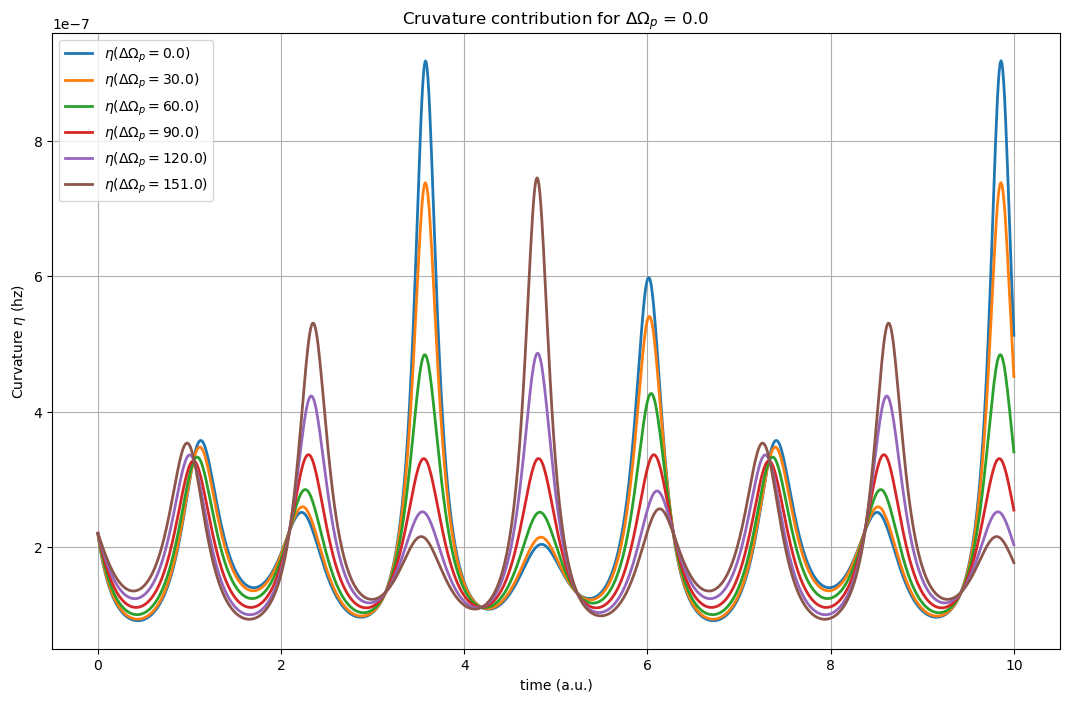

In [30]:
d = np.pi/180 * np.array([30, 60, 90, 120, 150])
DO = 0

def curvature2 (t, l, c, C, wp, we, Ae, xe, d1, DO ):
    xp , Ap = orbital_params(DO + d1, 1, 1, 1, ip[0])
    eta = l/(2*c) * np.abs( Ae * np.sin(we*t - xe) + Ap * np.sin( wp * t - xp) + C ) **(-1)
    return eta

plt.figure(figsize = (13,8))

xp , Ap = orbital_params(DO, 1, 1, 1, ip[0])
eta = l/(2*c) * np.abs( Ae * np.sin(we*t - xe) + Ap * np.sin( wp * t - xp) + C ) **(-1)
plt.plot(t,eta, label = "$\eta( \Delta \Omega_p = $" + str(DO * 180/np.pi) + ")", lw = 2)

for i in range(0, len(d)):
    #plt.plot(t,curvature2 (t, l, c, C, wp, we, Ae, xe, d, DO )[1] , label = "$\eta( \Delta \Omega_p = $" + str((DO + d) * 180/np.pi) + ")", lw = 2)
    eta2 = curvature2(t, l, c, C, wp, we, Ae, xe, d[i], DO )
    plt.plot(t,eta2, label = "$\eta( \Delta \Omega_p = $" + str(np.ceil((DO + d[i])*180/np.pi))+ ")", lw = 2)
    
plt.grid() 
plt.legend()
plt.title("Cruvature contribution for " + "$\Delta \Omega_p$ = " + str(np.ceil(DO * 180 / np.pi)))
plt.ylabel('Curvature ' + '$\eta$' + ' (hz)', )
plt.xlabel( 'time (a.u.)')

In [ ]:
curvature (t, )

In [34]:
#Initial parameters
#inclination angle
ip = 88.69;

#Delta Omega (degrees to rad)
DOd = np.arange(0,360,10)

DO = DOd / 180 * np.pi

DO

array([0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
       0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
       1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
       2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
       3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
       4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
       5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
       6.10865238])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


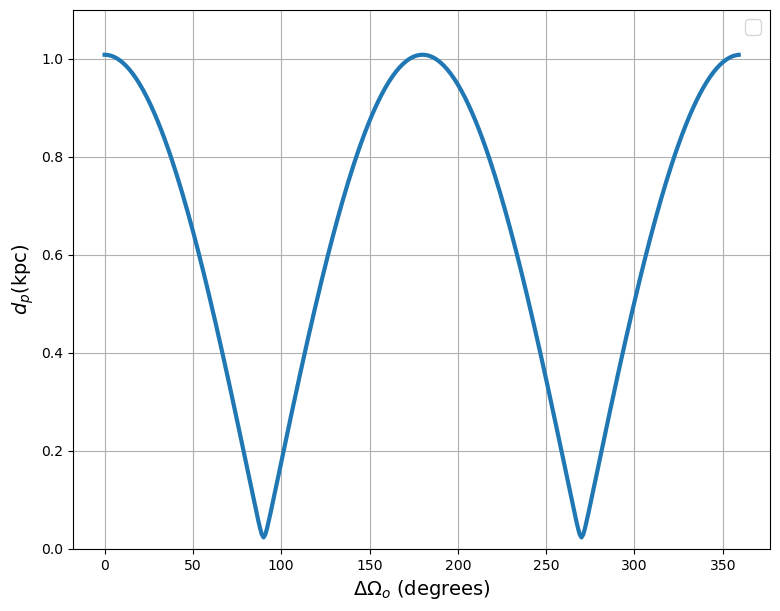

In [32]:
#Initial parameters
#inclination angle
ip = 88.69;

#Delta Omega (degrees to rad)
DOd = np.arange(0,360,1)

DO = DOd / 180 * np.pi;

#pulsar radial velocity amplitude
#Taken from M. Kramer et al., Strong-Field Gravity Tests with the Double Pulsar, Phys. Rev. X 11, 041050 (2021).
p_orb_p = 0.102 * u.day
asini_p = 1.41502860 * const.c * u.s
Kp = 2.*np.pi * asini_p / p_orb_p


#Effective distance (in pc) (from Rickett paper)
deff = 0.805 * u.pc;
#Modulation coefficient (I just gave it a value)
A = 2.01e15 * u.km/u.s/u.pc**0.5 * 1;

#distance relation
dts = 86400 * u.d / u.s
kmm = 1e3 * u.km / u.m

plt.figure(figsize=(9,7))
dp = Kp * np.sqrt(deff) / A / np.sin(ip / 180 * np.pi) * np.sqrt( np.cos(DO)**2 + np.sin(DO)**2 * np.cos(ip/ 180 * np.pi)**2 )* dts * kmm /1000 # to kpc;

#plotting function
fntsize = 14;
plt.plot(DOd, dp, lw=3)
plt.grid(); plt.legend(fontsize = fntsize)

plt.xlabel('$\Delta \Omega_o$' + ' (degrees)', fontsize = fntsize)
plt.ylabel('$d_p$' + '(kpc)', fontsize = fntsize)
# plt.title(" $A_0 = 1e^16$" + " [km/s/pc^2]" + "$ \quad \Delta \Omega_p =$" + str(DOd ) +"$ ^o$")
plt.grid(); plt.legend(fontsize = fntsize); 
plt.grid(); plt.ylim([0,1.1])
#plt.xticks([0 ,30, 60, 90, 120, 150, 180])      
plt.savefig("distance as a func of DO.jpg")

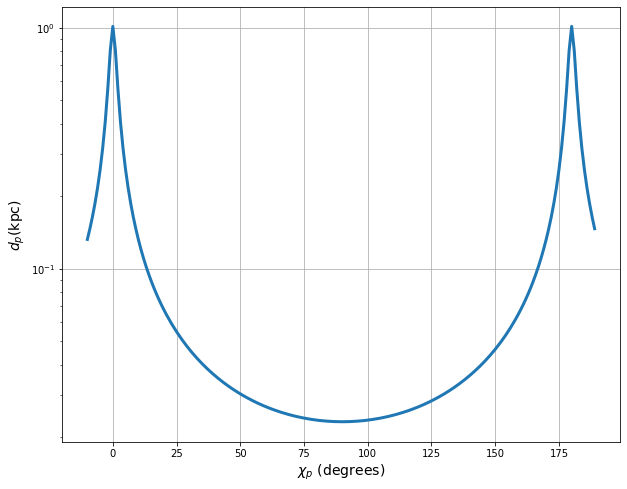

In [45]:
#Asume chi_p was fitted to chi degrees
chi_grand = np.arange(-10, 190, 1)
chi = chi_grand * np.pi/180;

plt.figure(figsize=(10,8))

A = 2e15 * u.km/u.s/u.pc**0.5
ip = 88.69 * np.pi/180;

dp1 = Kp *  np.sqrt(deff) / A / np.sin(ip) * np.sqrt ((1-np.sin(ip)**2) / (1-np.sin(ip)**2 * np.cos(chi)**2)) * dts * kmm /1000
plt.plot(chi_grand, dp1 , lw=3)





plt.yscale('log')
plt.ylabel('$d_p$' + '(kpc)', fontsize = fntsize)
plt.xlabel('$\chi_p$' + ' (degrees)', fontsize = fntsize)
plt.grid()
#plt.savefig("cosDO i.jpg")
#plt.xlim([0,175])
#plt.ylim([1e-3, 1e3])

plt.savefig("dp as a function of chi.jpg")

In [ ]:
phie = 2500*np.linspace(0,1,1000)
np.abs()